# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

## PUNTO 2

### 1. 

In [1]:
import pandas as pd # Para importar las BD
import numpy as np # Para trabajar con vectores, matrices y funciones especiales
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
plt.style.use('fivethirtyeight') # Para dar un estilo distinto a los gráficos

def printfuller(test_res):
    print("Prueba de Dickey Fuller")
    print(f"The test statistic: \t {round(test_res[0], 10)}")
    print(f"p-value: \t \t {round(test_res[1], 10)}")

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_excel("../Data/datos_parcial2.xlsx", sheet_name= "datos2")

In [4]:
data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [5]:
data.shape

(521, 2)

In [6]:
data.tail()

,date,value
516,2021-05-31,-92.78
517,2021-06-01,-91.90
518,2021-06-02,-92.96
519,2021-06-03,-92.96
520,2021-06-04,-94.24


In [8]:
data.set_index("date", inplace=True)

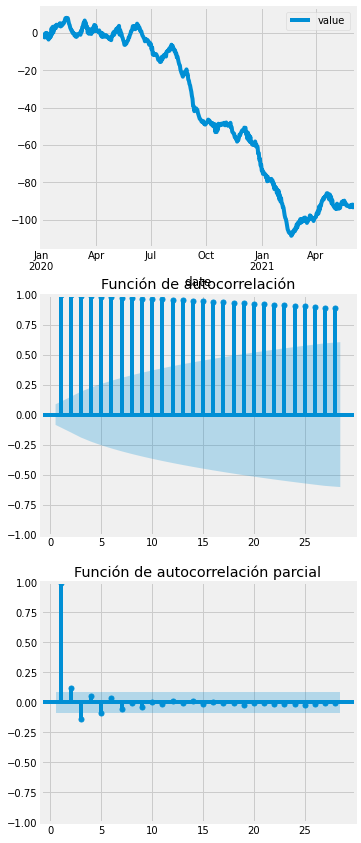

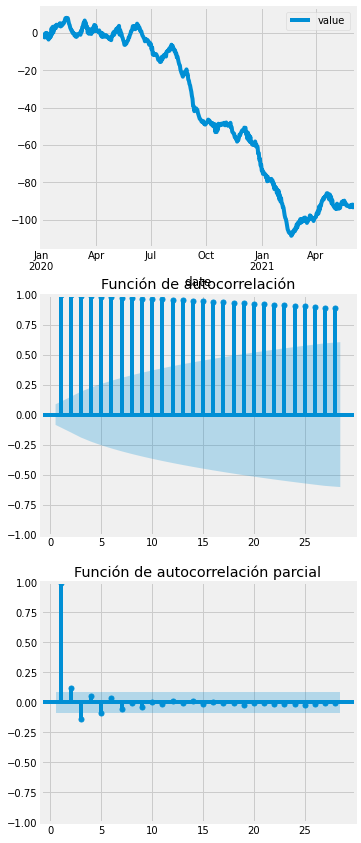

In [9]:
fig, ax = plt.subplots(3,1,figsize=(5,15))
data.plot(ax=ax[0])
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])

El grafico de la ACF nos puede ayudar para ver si la diferenciación es necesaria. Si el polinomio $φ(z)(1 − z)^d$ tiene una raiz unitaria, la ACF muestral no va a decaer a 0 rapidamente mientras los Lags incrementan. Este lento decaimiento nos indica que una diferenciacion es necesaria. Pag 136 

Como podemos ver en el grafico de la ACF mientras se aumenta los Lags se decae lentamente. Para confirmar nuestras sospechas vamos a realizar la prueba Dickey Fuller

In [10]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.1828263553
p-value: 	 	 0.9405379503


Ya que rechazo no la hipotesis entonces puedo afirmar que hay una raiz unitaria presente y el modelo no es estacionario.

Por esta razón hago una diferencia a mis datos originales, se pierde un dato ya que el primer registro de la serie no tiene un dato anterior para generar esta diferencia.

In [12]:
data_no_diff = data.copy()
data = data.value.diff().dropna()
data

date
2020-01-02   -0.10
2020-01-03   -0.63
2020-01-04    0.49
2020-01-05    0.22
2020-01-06   -1.46
              ... 
2021-05-31   -0.75
2021-06-01    0.88
2021-06-02   -1.06
2021-06-03    0.00
2021-06-04   -1.28
Name: value, Length: 520, dtype: float64

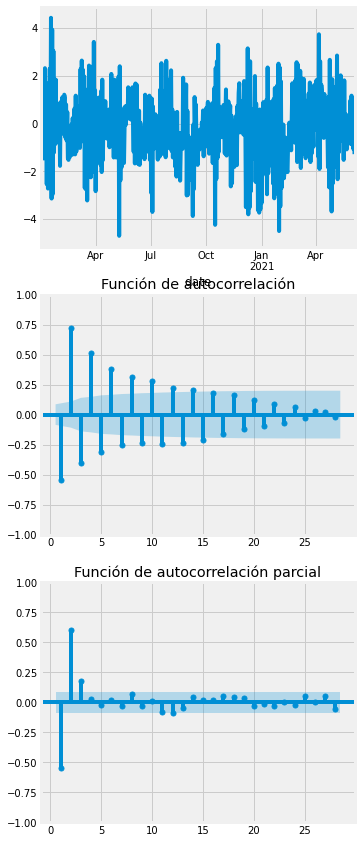

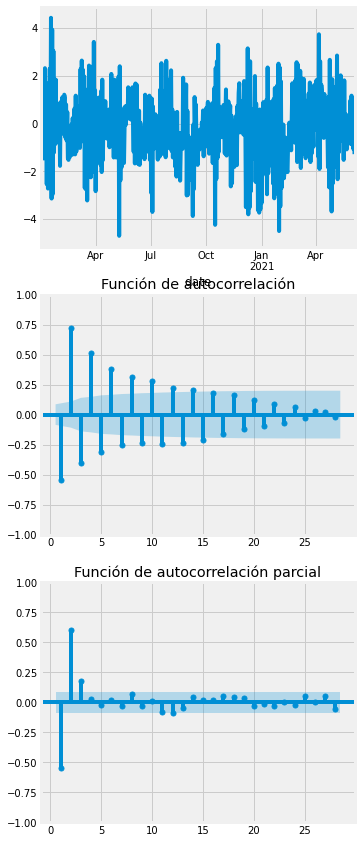

In [13]:
fig, ax = plt.subplots(3,1,figsize=(5,15))
data.plot(ax=ax[0])
plot_acf(data, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(data, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])

Como podemos ver en el grafico de la ACF ya no se ve un lento decaimiento, ademas se puede ver que la funcion ACF tiene una cola que decae de forma senoidal.
En la grafico de la PACF se ve un corte en el Lag 2. Se plantearan varios modelos.

Para confirmar que ya no se necesitan hacer mas diferencias se hace de nuevo el test de dickey fuller y se obtiene un rechazo de la hipotesis nula y se afirma que la serie con una diferencia es estacionaria.

In [14]:
test = adfuller(data)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -7.5240555018
p-value: 	 	 0.0


In [18]:
pdq_l = [(p, 1, q) for p in [0, 1, 2, 3] for q in [0, 1, 2, 3]]

In [19]:
lol = []
for order in pdq_l:
    aic = ARIMA(data_no_diff, order=order).fit().aic
    bic = ARIMA(data_no_diff, order=order).fit().bic
    lol.append([order, aic, bic])

In [20]:
pd.DataFrame(lol, columns=["order", "aic", "bic"])

,order,aic,bic
0,"(0, 1, 0)",1905.382122,1909.635951
1,"(0, 1, 1)",1837.466901,1845.974559
2,"(0, 1, 2)",1595.240520,1608.002007
3,"(0, 1, 3)",1589.407369,1606.422684
4,"(1, 1, 0)",1739.318754,1747.826412
5,"(1, 1, 1)",1618.543723,1631.305210
6,"(1, 1, 2)",1543.344586,1560.359901
7,"(1, 1, 3)",1511.461596,1532.730740
8,"(2, 1, 0)",1486.407338,1499.168825
9,"(2, 1, 1)",1469.154777,1486.170092


In [21]:
modelo = ARIMA(data_no_diff, order=(2, 1, 0)).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  521
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -740.204
Date:                Sat, 01 Oct 2022   AIC                           1486.407
Time:                        12:58:03   BIC                           1499.169
Sample:                    01-01-2020   HQIC                          1491.407
                         - 06-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1974      0.037     -5.314      0.000      -0.270      -0.125
ar.L2          0.6218      0.035     17.715      0.000       0.553       0.691
sigma2         1.0066      0.057     17.658      0.000       0.895       1.118
===================================================================================
Ljung-Box (L1) (Q):                   8.91   Jarque-Bera (JB):                 4.76
Prob(Q):                              0.00   Prob(JB):                         0.09
Heteroskedasticity (H):               1.03   Skew:                            -0.14
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$X_t = 0.7789 X_{t-1} - 0.7655 X_{t-2} + 0.3144 X_{t-3} + w_t + 0.3144 w_{t-1}$

In [22]:
sm.stats.acorr_ljungbox(modelo.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,8.920674,0.002820
2,9.992138,0.006764
3,15.528063,0.001417
4,15.712658,0.003430
5,18.935293,0.001976
6,19.907344,0.002877
7,21.894796,0.002649
8,22.059223,0.004807
9,23.109135,0.005956
10,25.073062,0.005209


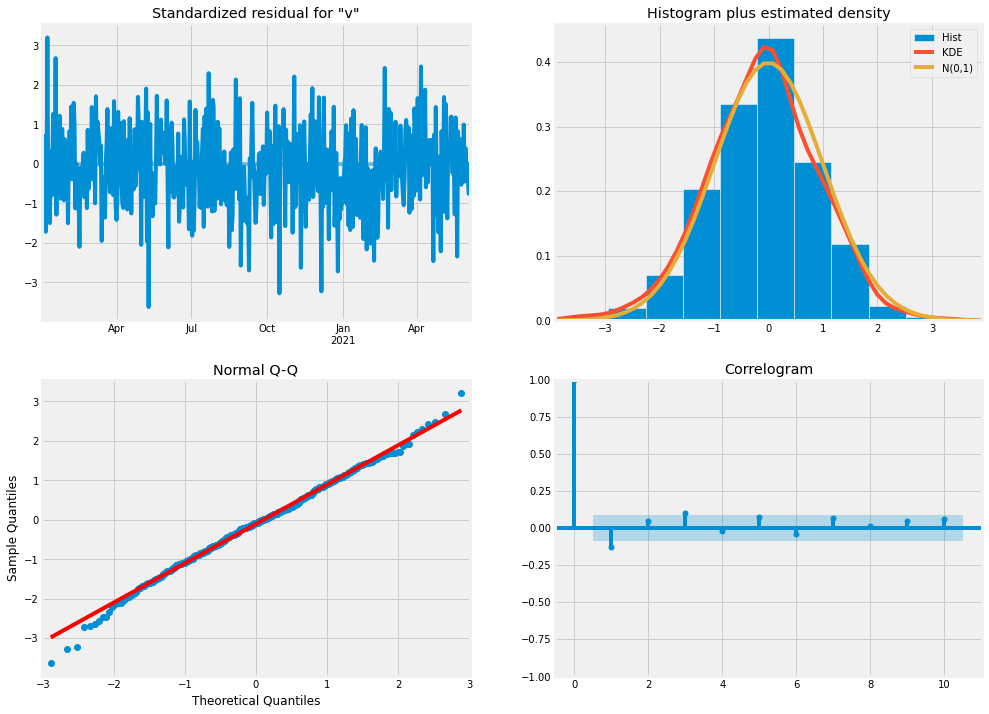

In [23]:
modelo.plot_diagnostics(figsize=(15,12))
plt.show()

In [24]:
fore = modelo.get_forecast(6) # Note que está haciendo predicción del 2021-12 porque no hay 12*12=144 datos sino 143
fore_ci = fore.conf_int()
fore_ci

,lower value,upper value
2021-06-05,-95.953740,-92.020939
2021-06-06,-97.354566,-92.311708
2021-06-07,-98.335069,-90.683082
2021-06-08,-99.604694,-90.593252
2021-06-09,-100.357701,-89.204351
2021-06-10,-101.449631,-88.971555


In [25]:
data.tail()

date
2021-05-31   -0.75
2021-06-01    0.88
2021-06-02   -1.06
2021-06-03    0.00
2021-06-04   -1.28
Name: value, dtype: float64

In [26]:
pred = modelo.get_prediction(start=len(data), end=len(data)+5, dynamic=False) # dynamic=False evita que las predicciones futuras
                                                               # se conviertan en datos de la muestra para predicciones 
                                                               # que van más adelante.
pred_ci = pred.conf_int(alpha = 0.05) # Intervalo de confianza 
pred_ci

,lower value,upper value
2021-06-04,-95.585525,-91.652725
2021-06-05,-95.953740,-92.020939
2021-06-06,-97.354566,-92.311708
2021-06-07,-98.335069,-90.683082
2021-06-08,-99.604694,-90.593252
2021-06-09,-100.357701,-89.204351


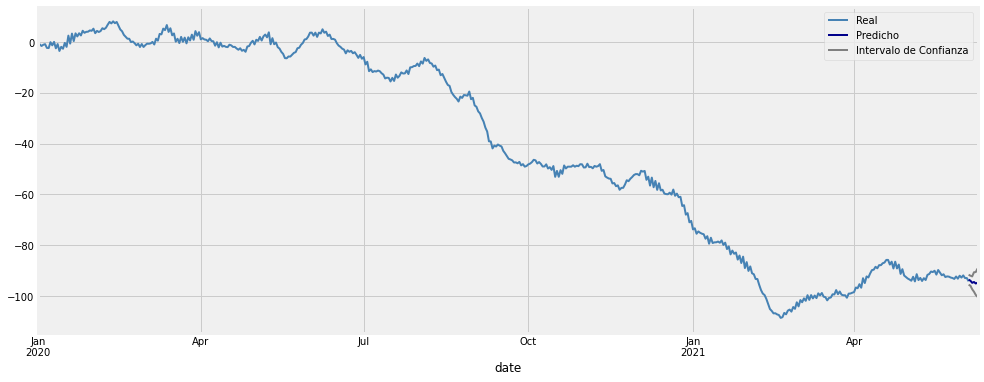

In [35]:
#plt.figure(figsize=(16,8))  #  Graficamos:
data_no_diff.plot(color = "steelblue", figsize=(15,6), linewidth = 2)
pred.predicted_mean.plot(color="darkblue", linewidth = 2)
pred_ci.iloc[:,0].plot(color="gray", linewidth = 2)
pred_ci.iloc[:,1].plot(color="gray", linewidth = 2)
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])